In [1]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
yf.pdr_override()

In [2]:
start="2020-12-31"
end="2022-12-31"
name="AAPL"

#MACD619RSI21_8020
stock_data=pct_change(name,start,end)
stock_data=stock_data.copy()

#指标运算
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)
stock_data= my_rsi(stock_data, 21)
del stock_data["real_situation"]
stock_data = stock_data.dropna()


#print(stock_data)


#X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]].values
X = stock_data.loc[:,["re_close", "re_open", "my_rsi", "Position", "RSI21"]]
print(X)
st_x= StandardScaler()  
X= st_x.fit_transform(X)  
print(X)
#Y = stock_data.loc[:,["up_or_down"]].values.ravel()
Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)

            re_close   re_open    my_rsi  Position      RSI21
Date                                                         
2021-02-03  0.152778  0.995366  0.454127        -1  54.368370
2021-02-04  0.996443  0.608544  0.526673        -1  57.348233
2021-02-05  0.576920  0.955133  0.486111        -1  56.639046
2021-02-08  0.975489  0.544116  0.517102        -1  56.772694
2021-02-09  0.078812  0.379305  0.465740        -1  55.691336
...              ...       ...       ...       ...        ...
2022-12-23  0.798562  0.460431  0.365719        -1  39.225752
2022-12-27  0.486987  0.988848  0.332003        -1  37.826304
2022-12-28  0.032945  0.736434  0.308548        -1  34.970080
2022-12-29  0.683637  0.094544  0.337056        -1  39.277645
2022-12-30  0.992062  0.388891  0.380272        -1  39.653853

[482 rows x 5 columns]
[[-1.128675    1.69633022 -0.56773884 -0.95535251  0.30374278]
 [ 1.44811211  0.40808075 -0.0650234  -0.95535251  0.63931812]
 [ 0.1667717   1.5623418  -0.34610168 -0.955

In [3]:
print('The shape of our features is:', stock_data.shape)
# Descriptive statistics for each column
stock_data.describe()

The shape of our features is: (482, 20)


,Open,High,Low,Close,Adj Close,Volume,Close_price_percentage,log_return,re_close,re_open,up_or_down,EMA6,EMA19,DIF,MACD,Position,RSI6,RSI14,RSI21,my_rsi
count,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,148.452843,150.243755,146.719606,148.539606,147.123387,8.806619e+07,0.000106,-0.000079,0.522317,0.486010,0.506224,148.567464,148.517275,0.050189,0.110200,-0.045643,51.273375,51.534428,51.671175,0.536056
std,15.435325,15.662461,15.259497,15.487822,15.520966,2.600389e+07,0.019292,0.019268,0.327750,0.300581,0.500481,15.105587,14.398706,3.393645,2.991616,0.999996,18.451699,11.502619,8.889090,0.144457
min,119.029999,120.400002,116.209999,116.360001,114.662354,3.519590e+07,-0.058680,-0.060472,0.004184,0.000000,0.000000,120.670024,122.277311,-8.365363,-6.865316,-1.000000,7.736545,28.534189,34.155729,0.214765
25%,136.637497,138.002502,134.672497,136.922504,135.267548,7.036815e+07,-0.010888,-0.010948,0.222401,0.210385,0.000000,137.733277,139.537363,-2.585637,-2.203696,-1.000000,37.496099,42.234511,44.601305,0.411128
50%,147.800003,149.290001,146.149994,148.019997,146.601746,8.325120e+07,-0.000168,-0.000168,0.521322,0.510534,1.000000,147.128376,147.257022,0.032519,0.144469,-1.000000,50.759674,50.363990,50.450072,0.524476
75%,160.012505,162.709995,157.697502,159.952496,158.527992,9.926695e+07,0.012633,0.012554,0.852592,0.743418,1.000000,160.735385,161.265322,2.456426,2.084092,1.000000,64.654176,59.896145,58.027936,0.646331
max,182.630005,182.940002,179.119995,182.009995,180.190964,1.954327e+08,0.088975,0.085236,1.000000,1.000000,1.000000,179.168205,175.157704,8.219328,6.742969,1.000000,94.519508,81.306163,75.035441,0.875963


In [4]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

split = int(0.8*len(stock_data))
X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]

In [5]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (385, 5)
Training Labels Shape: (385,)
Testing Features Shape: (97, 5)
Testing Labels Shape: (97,)


In [6]:

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(max_depth= 4, n_estimators=184)
# Train the model on training data
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, n_estimators=184)

In [7]:
Y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8041237113402062


In [8]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbe34354cd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbe3427e0d0>})

In [9]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)



Best hyperparameters: {'max_depth': 1, 'n_estimators': 58}


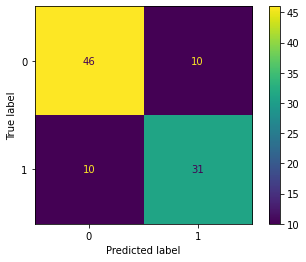

In [10]:
Y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [11]:
Y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7938144329896907
Precision: 0.7560975609756098
Recall: 0.7560975609756098


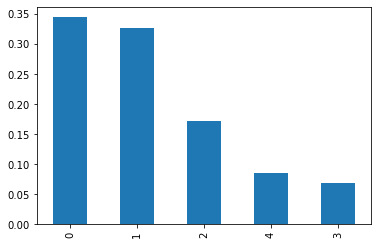

In [12]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();